<a href="https://colab.research.google.com/github/felipemunarol/UFF-Projects/blob/main/src/dados_geograficos_conjuntos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validacao da leitura dos dados de kml das bases que contem as informacoes geograficas

In [ ]:
! pip install geotable  # Library to read the kmz file
! pip install geopandas # https://geopandas.org/en/stable/docs/user_guide/io.html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.0 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=6b8f0c5e0fdafd04360300009c9a1e27278e434ea9a0ca41984ee531db94c1a0
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
# libraries
import csv
import pandas as pd
import os
# import ckan
import requests
import geopandas as gpd
import urllib
import time
import geotable
import sys
import ast
import codecs
from zipfile import ZipFile
import fiona

pd.set_option('display.max_columns', None)

# Conecta o serviço com o Drive
from google.colab import drive
drive.mount('/content/drive')

os.environ['ROOT'] = '/content/drive/MyDrive/Mestrado/Ordens_servico/'
base_path = os.environ.get("ROOT")

Mounted at /content/drive


In [ ]:
year = 2021

In [ ]:
# Raiz
! ls '/content/drive/MyDrive/Mestrado/Ordens_servico/'

'Apresentacoes Andamento'  'Doc Dissertação.gdoc'  'Tese Latex'
'Definição Problema.gdoc'   Doc.gdoc		    Tese.pdf
 Dissertaçao.docx	    Ordens_servico


## Geoinformation of sets

In [ ]:
# https://pypi.org/project/geotable/ -  open a geotable with geopandas
t = geotable.load(base_path + "Ordens_servico/AHE_DOWN_LayerToKML.kmz")

In [ ]:
from geotable.projections import LONGITUDE_LATITUDE_PROJ4
t.save_shp(base_path + "Ordens_servico/AHE_DOWN_LayerToKMLSHP.zip", target_proj4=LONGITUDE_LATITUDE_PROJ4)

'/content/drive/MyDrive/Mestrado/Ordens_servico/Ordens_servico/AHE_DOWN_LayerToKMLSHP.zip'

In [ ]:
t_g = gpd.read_file(base_path + "Ordens_servico/AHE_DOWN_LayerToKMLSHP.zip")

<Axes: >

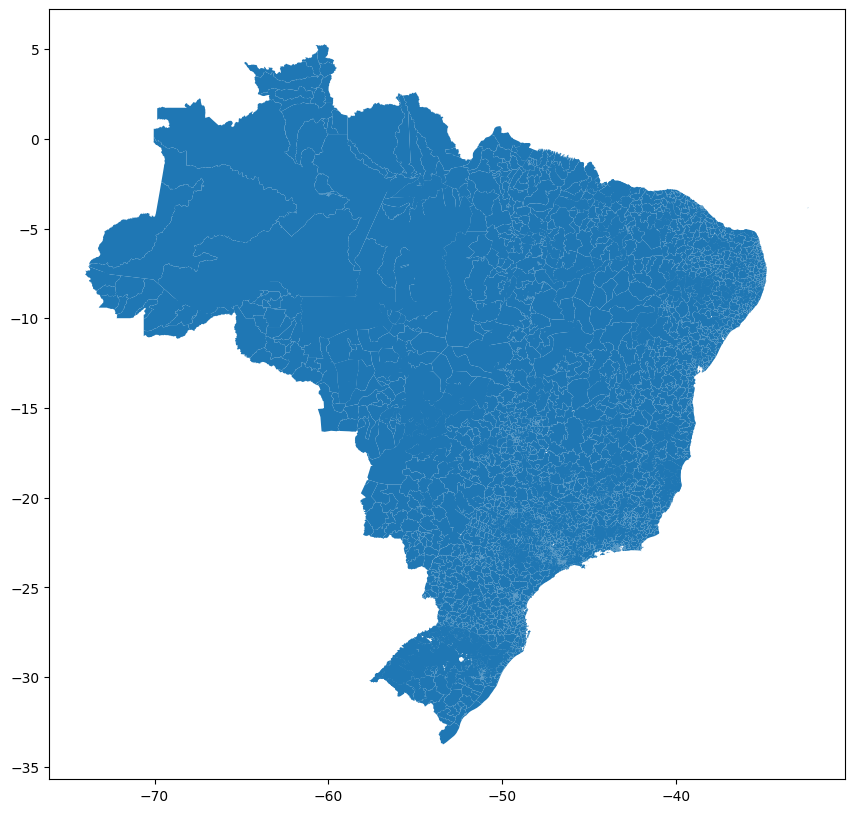

In [ ]:
t_g.plot(figsize=(20,10))

In [ ]:
# Pass the id of the set to integer
t_g["Name"] = t_g.Name.astype("int")
# validacao de um conjunto
t_g[t_g.Name == 15587]

,Name,geometry
1830,15587,"POLYGON Z ((-48.56401 -27.59334 0.00000, -48.5..."


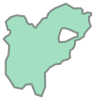

In [ ]:
t_g[t_g.Name==14843].geometry.iloc[0]

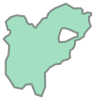

In [ ]:
t_g[t_g.Name==14843].geometry.iloc[1]

In [ ]:
# Foram encontrados no arquivo KML casos repetidos que sao retirados da base
t_g = t_g.drop_duplicates('Name')

In [ ]:
# Exsistem 3636 bases mapeadas pelo SIGEL
t_g

,Name,geometry
0,12525,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3..."
1,16509,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9..."
2,15630,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6..."
3,13593,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7..."
4,13851,"POLYGON Z ((-47.88184 -22.43132 0.00000, -47.8..."
...,...,...
3651,12965,"POLYGON Z ((-46.91569 -23.59842 0.00000, -46.9..."
3652,12907,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7..."
3653,12863,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6..."
3654,13771,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9..."


In [ ]:
de_para_conj = pd.read_csv(base_path + "Ordens_servico/de_para_und_cons.csv")
de_para_conj

,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras
0,0,12479.0,CERPALO
1,12,12593.0,Sena Madureira
2,24,12597.0,Tangará
3,36,12636.0,cerbranorte
4,48,12643.0,Ariquemes
...,...,...,...
3382,2520359,16898.0,MATO ALTO
3383,2520360,16905.0,TOBIAS BARRETO
3384,2520405,16916.0,ITARANA
3385,2520406,16923.0,PARATI


In [ ]:
# Existem 3125 conjuntos em que temos o identificador e a geometria mapeados
de_para_conj_ = t_g.merge(de_para_conj, left_on="Name", right_on="IdeConjUndConsumidoras", how='inner')
de_para_conj_

,Name,geometry,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras
0,12525,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3...",110418,12525.0,CAMAQUÃ
1,16509,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9...",325886,16509.0,Guaporé
2,15630,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6...",5815,15630.0,DOURADOS DAS NAÇÕES
3,13593,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7...",111517,13593.0,TIETE
4,15044,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2...",4255,15044.0,TERRA NOVA AEREO
...,...,...,...,...,...
3120,16198,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18...",6992,16198.0,MATOES
3121,12907,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7...",110762,12907.0,EMBU GUAÇU
3122,12863,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6...",429525,12863.0,MIMOSO
3123,13771,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9...",327562,13771.0,RODEIRO


In [ ]:
de_para_conj_.to_file(base_path + "Ordens_servico/de_para_und_cons_.json", driver='GeoJSON')

## Inclui as informacoes geograficas (caracteristica geograficas) nas informacoes de conjuntos

Sao adicionados o raio, o perimetro e a area de cada conjunto

---



In [ ]:
# Reference to CRS Coordinate System - https://rspatial.org/terra/spatial/6-crs.html

In [ ]:
de_para_conj_ = gpd.read_file(base_path + "Ordens_servico/de_para_und_cons_.json", driver='GeoJSON')

<Axes: >

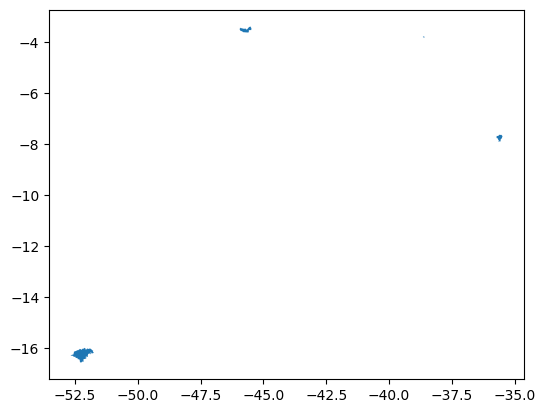

In [ ]:
# Alguns conjuntos apresentam a mesma descricao porem com IDs e coordenadas geograficas diferentes. Esses dados sao retirados
de_para_conj_[de_para_conj_.DscConjUndConsumidoras == "BOM JARDIM"].plot()

In [ ]:
# 94 conjuntos dos 3125 apresentam dados com nomes repetidos - Casos retirados
de_para_conj_repeated = de_para_conj_.groupby(["DscConjUndConsumidoras"])["geometry"].count().sort_values(ascending=False)
de_para_conj_repeated = de_para_conj_repeated[de_para_conj_repeated > 1]
de_para_conj_ = de_para_conj_[~de_para_conj_.DscConjUndConsumidoras.isin(de_para_conj_repeated.index)]
de_para_conj_

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3..."
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9..."
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6..."
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7..."
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2..."
...,...,...,...,...,...,...,...,...,...
3120,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18..."
3121,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7..."
3122,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6..."
3123,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9..."


In [ ]:
# Faz o processomento espacial de buffer das coordenadas geograficas de latitude e longitude
# Aplicacao do buffet
# gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.LONGITUDE, df.LATITUDE), crs="EPSG:5880")
# gdf = gdf.to_crs("EPSG:5880")
# gdf["buffered"] = gdf.buffer(1000000)
# # https://reconshell.com/wp-content/uploads/2022/09/Machine_Learning_on_Geographical_Data_Using_Python.pdf
# gdf[["geometry", "buffered"]]

In [ ]:
# Returns a Series with the radio of the minumum bounding circle that contain it
de_para_conj_["MUN_MINIMUM_BOUND_RADIO"] = de_para_conj_.geometry.minimum_bounding_radius()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Returns a Series containing the length of each geometry expressed in the units of the CRS. - https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.length.html

In [ ]:
# Return the number of boundarys of a Polygon (aproximmation to perimeter). Return only for Polygons, to Multigeometry (regions with multi polygons) need a treatment to calculate
def get_boundarys_number(row):
  if row.geometry:
    multi = row.geometry.type.startswith("Multi")

    if multi:
      # n =0
      return "Multipolygon"
      # inter over all parts of geometry
      # for part in row.geometry:
        # n = n + len(part.exterior.coords)

    else:
      n = len(row.geometry.exterior.coords)

    return n

  else:
    return None

de_para_conj_["MUN_NUMBER_OF_BOUNDARYS"] = de_para_conj_.apply(get_boundarys_number, axis=1)
de_para_conj_["MUN_NUMBER_OF_BOUNDARYS"]

<ipython-input-113-d70e5d2f8e48>:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  multi = row.geometry.type.startswith("Multi")
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0        149
1        531
2        516
3        440
4        408
        ... 
3120     539
3121      90
3122    3552
3123      77
3124    1233
Name: MUN_NUMBER_OF_BOUNDARYS, Length: 2922, dtype: object

In [ ]:
# Return the lenght (perimeters) of each geometry
de_para_conj_["LENGTH"] = de_para_conj_.geometry.length

<ipython-input-114-adf52cda0e41>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  de_para_conj_["LENGTH"] = de_para_conj_.geometry.length
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
de_para_conj_["AREA"] = de_para_conj_.geometry.area

<ipython-input-115-67b756ef2642>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  de_para_conj_["AREA"] = de_para_conj_.geometry.area


In [ ]:
de_para_conj_

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3..."
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9..."
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6..."
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7..."
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2..."
...,...,...,...,...,...,...,...,...,...
3120,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18..."
3121,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7..."
3122,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6..."
3123,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9..."


In [ ]:
de_para_conj_.to_file(base_path + "Ordens_servico/de_para_und_cons_.json", driver='GeoJSON')